In [55]:
library(dplyr)
options(warn = -1)
options(scipen=100)

# 1880년 부터 2014까지의 미국의 아기 이름을 정리해놓은 데이터 셋

In [46]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv", stringsAsFactors = F)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,01/01/1880 12:00:00 AM,1
Anna,F,2604,01/01/1880 12:00:00 AM,2
Emma,F,2003,01/01/1880 12:00:00 AM,3
Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
Minnie,F,1746,01/01/1880 12:00:00 AM,5
Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [47]:
tail(baby)
# Year 데이터에 쓸데없는 글자(1월1일 12시)들이 들어가 있다 
str(baby) 
# Name이 Factor로 들어가 있다, 
baby$Gender <- as.factor(baby$Gender)
# 성별은 Factor로 있어야 한다
str(baby)

,Name,Gender,Count,Year,Year.Rank
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...
'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [48]:
# baby의 YEAR부분 정리하기
# stringr remove쓰면 오래걸리고 프로그램 멈춘다.... 주의하기.....
# baby$Year <- substr(baby$Year, 7, 10)
head(baby)

Name,Gender,Count,Year,Year.Rank
Mary,F,7065,1880,1
Anna,F,2604,1880,2
Emma,F,2003,1880,3
Elizabeth,F,1939,1880,4
Minnie,F,1746,1880,5
Margaret,F,1578,1880,6


In [10]:
# 저장하기
write.csv(baby , "../Data/baby.csv", row.names = F)

In [14]:
summary(baby) 
# 여자아이 값이 더 큰 것은 여자아이 이름 종류가 더 많은 것이지 성비가 여자가 높다는 뜻이 아니다

     Name           Gender          Count             Year          
 Length:1825388     F:1081660   Min.   :    5.0   Length:1825388    
 Class :character   M: 743728   1st Qu.:    7.0   Class :character  
 Mode  :character               Median :   12.0   Mode  :character  
                                Mean   :  184.7                     
                                3rd Qu.:   32.0                     
                                Max.   :99680.0                     
   Year.Rank    
 Min.   :    1  
 1st Qu.: 1790  
 Median : 4009  
 Mean   : 5301  
 3rd Qu.: 7820  
 Max.   :20548  

In [34]:
# 인구분포 현황 그래프 그리기 
# baby에서 여자아이만 Female이라는 dataset을 만들고 row 수 구하기
Female <- subset(baby, Gender == 'F')
nrow(Female)
Male <- subset(baby, Gender == 'M')
nrow(Male)
Female$Gender <- factor(Female$Gender)
Male$Gender <- factor(Male$Gender)


[1] 1081660

[1] 743728

In [35]:
# 여자아이 이름 중복 제거하고 갯수 구하기
length(unique(Female$Name))
# 유일한 여자아이 이름 20개만 출력하기 
head(unique(Female$Name), 20)

[1] 64911

[1] "Mary"      "Anna"      "Emma"      "Elizabeth" "Minnie"    "Margaret" 
 [7] "Ida"       "Alice"     "Bertha"    "Sarah"     "Annie"     "Clara"    
[13] "Ella"      "Florence"  "Cora"      "Martha"    "Laura"     "Nellie"   
[19] "Grace"     "Carrie"

--- 
### 가장 많이 사용된 여자 아이 이름 10개 보여주기

In [49]:
head(arrange(aggregate(Count ~ Name , Female , sum), desc(Count)), 10)
head(arrange(aggregate(Count ~ Name , Male , sum), desc(Count)), 10)

Name,Count
Mary,4115282
Elizabeth,1601128
Patricia,1570567
Jennifer,1462742
Linda,1450843
Barbara,1432944
Margaret,1240006
Susan,1120469
Dorothy,1105680
Sarah,1060643


Name,Count
James,5105919
John,5084943
Robert,4796695
Michael,4309198
William,4055473
David,3577704
Joseph,2570095
Richard,2555330
Charles,2364332
Thomas,2283080


In [52]:
여자 <- aggregate(Count ~ Year , Female , sum)
남자 <- aggregate(Count ~ Year , Male , sum)

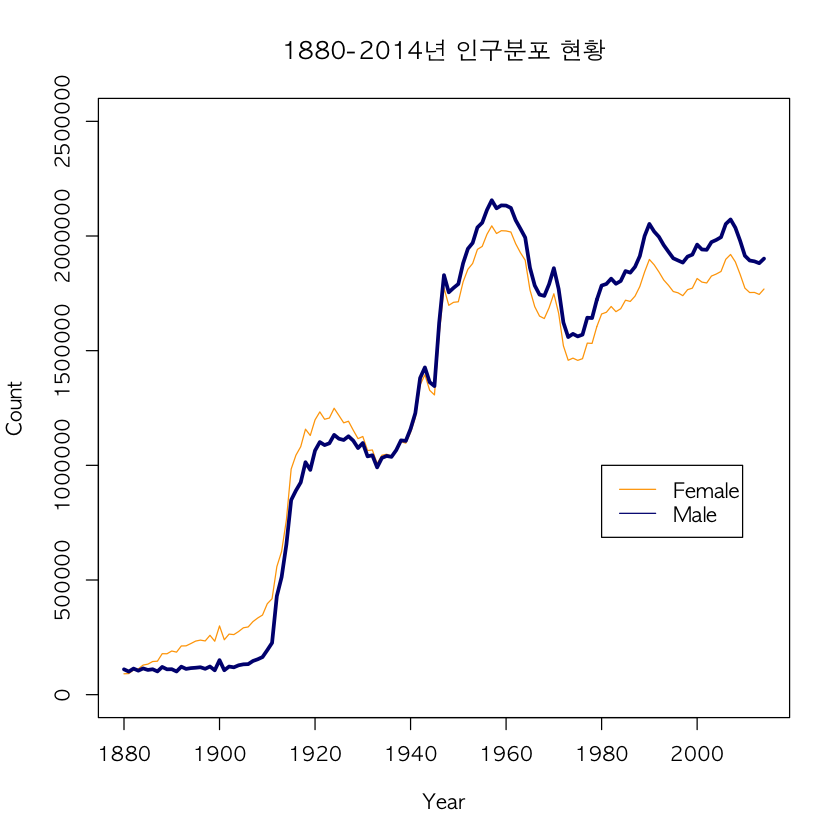

In [82]:
par(family = 'AppleGothic', bg = 'white')
plot(여자,
    type='l',
    col = 'orange',
    ylim = c(0, 2500000)
)
title(main="1880-2014년 인구분포 현황")

lines(
    남자,
    col = 'navy',
    lwd = 3, # 선굵기 변경 (강조)
)
# 범례
legend(1980,1000000, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("Female","Male"),
      col=c("orange","navy"),
      lty=1,
      cex=1  #기본 값이 1 
      )


> 끗